# Enhanced Azure Demand Forecasting - Additional Insightful Visualizations



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
# Loadinng the cleaned merged data
df = pd.read_csv('D:\infosysspringboard projects\project1-1stmilestine\AZURE_BACKEND_TEAM-B\data\processed\cleaned_merged.csv')
df['date'] = pd.to_datetime(df['date'])

# Create additional time-based features
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_of_week
df['week_of_year'] = df['date'].dt.isocalendar().week
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Create month names and day names for better visualization
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar'}
day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['month_name'] = df['month'].map(month_names)
df['day_name'] = df['day_of_week'].map(day_names)

print(f"Dataset loaded with {df.shape[0]} records from {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Regions: {df['region'].unique()}")
print(f"Resource types: {df['resource_type'].unique()}")

Dataset loaded with 1080 records from 2023-01-01 to 2023-03-31
Regions: ['East US' 'West US' 'North Europe' 'Southeast Asia']
Resource types: ['VM' 'Storage' 'Container']


## 1. Time Series Analysis - Multi-Metric Dashboard

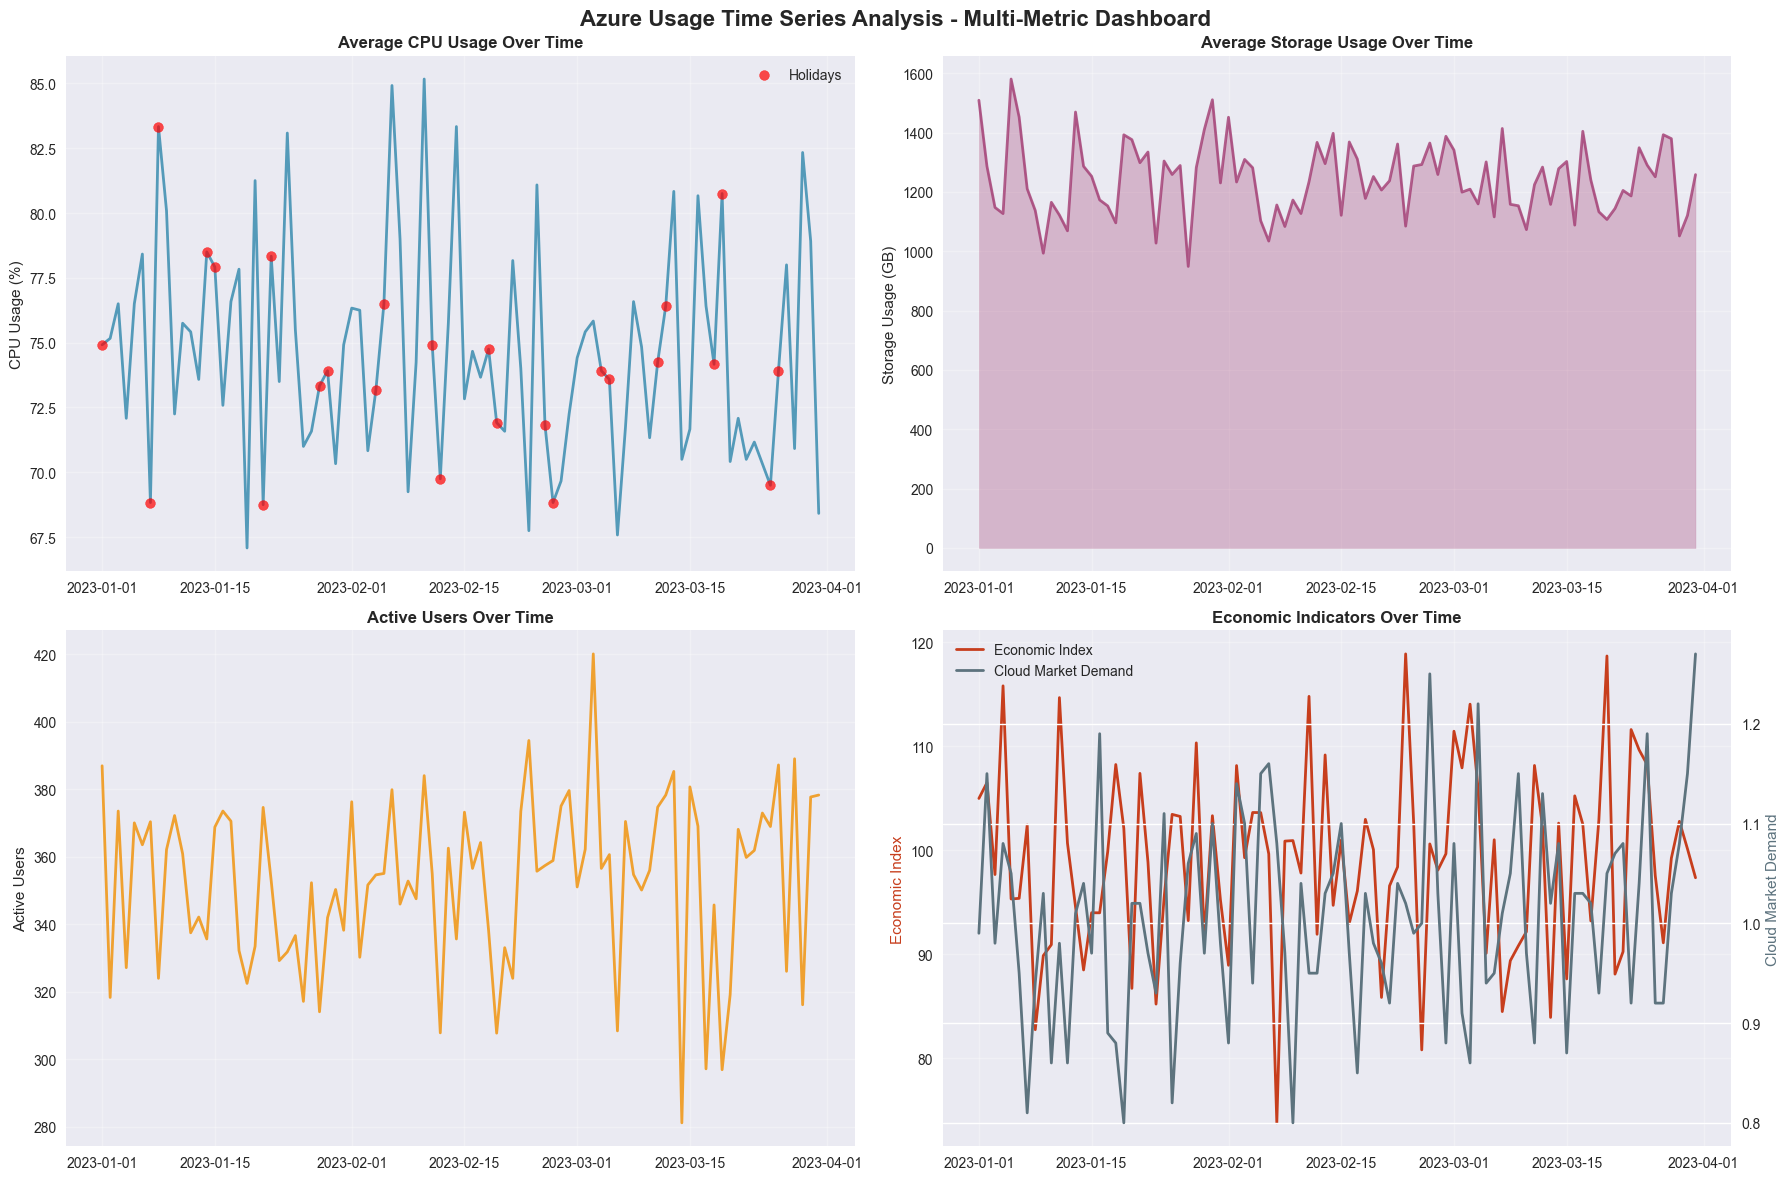

Saved total CPU usage over time plot


In [3]:
# Create a comprehensive time series dashboard
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Azure Usage Time Series Analysis - Multi-Metric Dashboard', fontsize=16, fontweight='bold')

save_path = r"D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/reports/advanced visualisation"


# Daily aggregated data
daily_data = df.groupby('date').agg({
    'usage_cpu': 'mean',
    'usage_storage': 'mean',
    'users_active': 'mean',
    'economic_index': 'first',
    'cloud_market_demand': 'first',
    'holiday': 'first'
}).reset_index()

# 1. CPU Usage over time with holiday markers
axes[0,0].plot(daily_data['date'], daily_data['usage_cpu'], linewidth=2, color='#2E86AB', alpha=0.8)
holiday_dates = daily_data[daily_data['holiday'] == 1]['date']
holiday_cpu = daily_data[daily_data['holiday'] == 1]['usage_cpu']
axes[0,0].scatter(holiday_dates, holiday_cpu, color='red', s=50, alpha=0.7, zorder=5, label='Holidays')
axes[0,0].set_title('Average CPU Usage Over Time', fontweight='bold')
axes[0,0].set_ylabel('CPU Usage (%)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Storage usage trends
axes[0,1].plot(daily_data['date'], daily_data['usage_storage'], linewidth=2, color='#A23B72', alpha=0.8)
axes[0,1].fill_between(daily_data['date'], daily_data['usage_storage'], alpha=0.3, color='#A23B72')
axes[0,1].set_title('Average Storage Usage Over Time', fontweight='bold')
axes[0,1].set_ylabel('Storage Usage (GB)')
axes[0,1].grid(True, alpha=0.3)

# 3. Active users trend
axes[1,0].plot(daily_data['date'], daily_data['users_active'], linewidth=2, color='#F18F01', alpha=0.8)
axes[1,0].set_title('Active Users Over Time', fontweight='bold')
axes[1,0].set_ylabel('Active Users')
axes[1,0].grid(True, alpha=0.3)

# 4. Economic index vs Cloud market demand
ax1 = axes[1,1]
ax2 = ax1.twinx()
line1 = ax1.plot(daily_data['date'], daily_data['economic_index'], color='#C73E1D', linewidth=2, label='Economic Index')
line2 = ax2.plot(daily_data['date'], daily_data['cloud_market_demand'], color='#5D737E', linewidth=2, label='Cloud Market Demand')
ax1.set_ylabel('Economic Index', color='#C73E1D')
ax2.set_ylabel('Cloud Market Demand', color='#5D737E')
ax1.set_title('Economic Indicators Over Time', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig(f"{save_path}/Azure_Usage_Time_Series_Analysis_Multi-Metric_Dashboard.png")
plt.show()
plt.close()
print("Saved total CPU usage over time plot")
plt.show()

## 2. Regional Performance Analysis

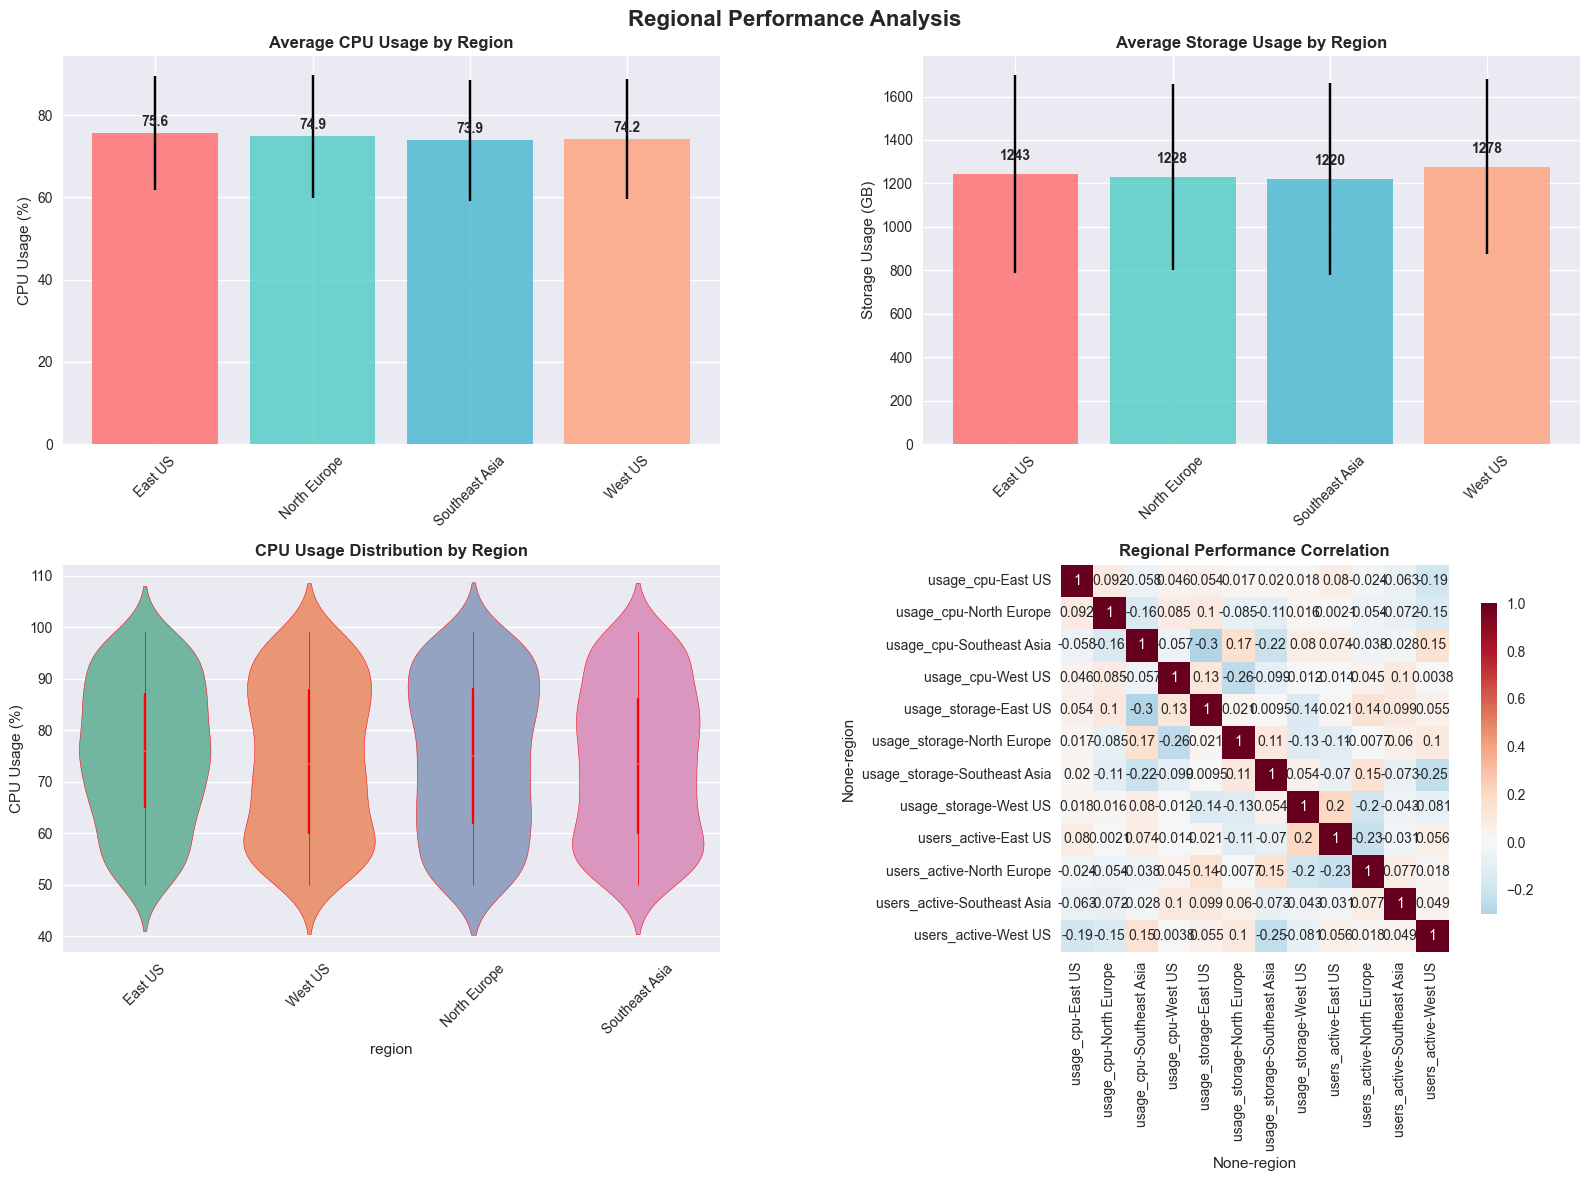

In [4]:
# Regional comparison analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Regional Performance Analysis', fontsize=16, fontweight='bold')

# 1. Average CPU usage by region
regional_stats = df.groupby('region').agg({
    'usage_cpu': ['mean', 'std'],
    'usage_storage': ['mean', 'std'],
    'users_active': ['mean', 'std']
}).round(2)

# Flatten column names
regional_stats.columns = ['_'.join(col).strip() for col in regional_stats.columns]

# CPU usage by region with error bars
regions = regional_stats.index
cpu_means = regional_stats['usage_cpu_mean']
cpu_stds = regional_stats['usage_cpu_std']

bars1 = axes[0,0].bar(regions, cpu_means, yerr=cpu_stds, capsize=5, 
                     color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.8)
axes[0,0].set_title('Average CPU Usage by Region', fontweight='bold')
axes[0,0].set_ylabel('CPU Usage (%)')
axes[0,0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, val in zip(bars1, cpu_means):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                  f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Storage usage by region
storage_means = regional_stats['usage_storage_mean']
storage_stds = regional_stats['usage_storage_std']

bars2 = axes[0,1].bar(regions, storage_means, yerr=storage_stds, capsize=5,
                     color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.8)
axes[0,1].set_title('Average Storage Usage by Region', fontweight='bold')
axes[0,1].set_ylabel('Storage Usage (GB)')
axes[0,1].tick_params(axis='x', rotation=45)

for bar, val in zip(bars2, storage_means):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                  f'{val:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Regional usage distribution (violin plot)
sns.violinplot(data=df, x='region', y='usage_cpu', ax=axes[1,0],linecolor="red", palette='Set2')
axes[1,0].set_title('CPU Usage Distribution by Region', fontweight='bold')
axes[1,0].set_ylabel('CPU Usage (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Regional correlation heatmap


region_wise = df.pivot_table(values=['usage_cpu', 'usage_storage', 'users_active'], 
                             index='date', columns='region')
correlation_matrix = region_wise.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
           square=True, ax=axes[1,1], cbar_kws={'shrink': 0.8})
axes[1,1].set_title('Regional Performance Correlation', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{save_path}/Regional Performance Analysis.png")
plt.show()

## 3. Resource Type Analysis and Optimization Insights

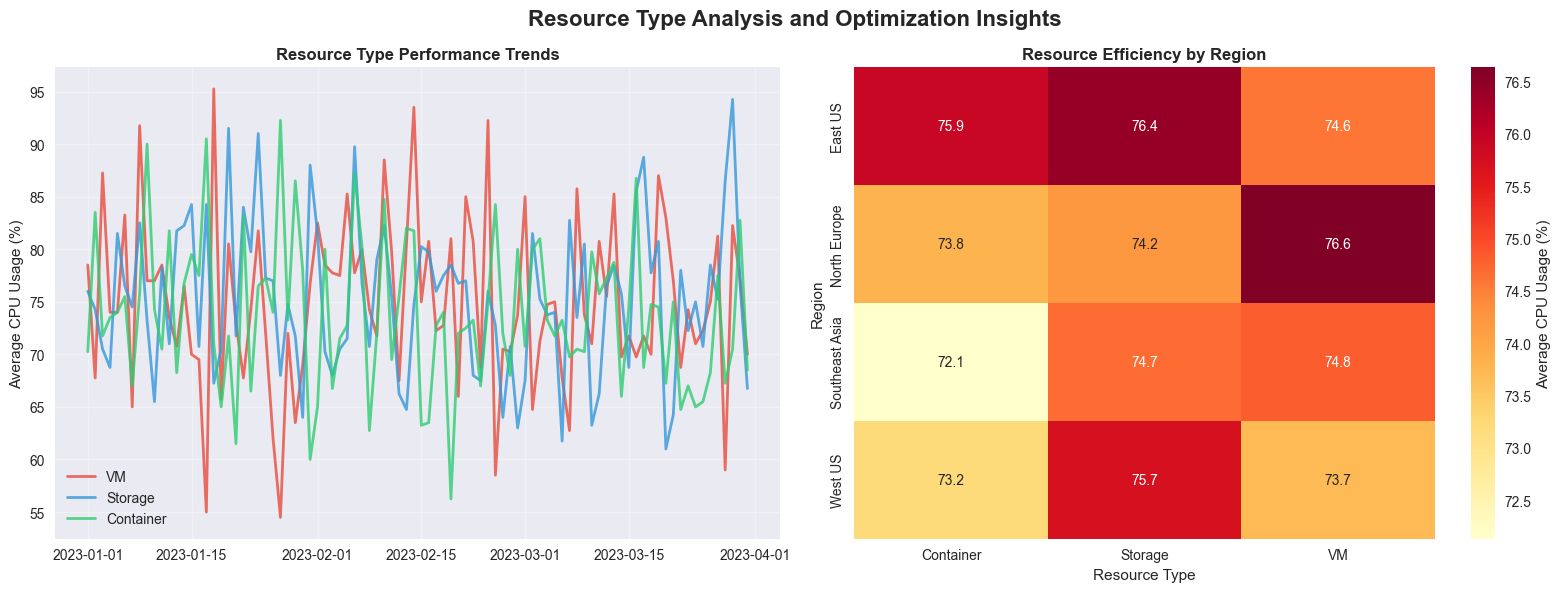

In [5]:
# Resource type analysis 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Resource Type Analysis and Optimization Insights', fontsize=16, fontweight='bold')

# Resource colors
resource_colors = {'VM': '#E74C3C', 'Storage': '#3498DB', 'Container': '#2ECC71'}

# 1️⃣ Resource type performance over time
resource_daily = df.groupby(['date', 'resource_type'])['usage_cpu'].mean().reset_index()
for resource in df['resource_type'].unique():
    subset = resource_daily[resource_daily['resource_type'] == resource]
    axes[0].plot(subset['date'], subset['usage_cpu'], 
                 linewidth=2, label=resource, color=resource_colors[resource], alpha=0.8)

axes[0].set_title('Resource Type Performance Trends', fontweight='bold')
axes[0].set_ylabel('Average CPU Usage (%)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2️⃣ Resource efficiency matrix (heatmap)
efficiency_matrix = df.groupby(['region', 'resource_type'])['usage_cpu'].mean().unstack()
sns.heatmap(efficiency_matrix, annot=True, fmt='.1f', cmap='YlOrRd', 
            ax=axes[1], cbar_kws={'label': 'Average CPU Usage (%)'})
axes[1].set_title('Resource Efficiency by Region', fontweight='bold')
axes[1].set_xlabel('Resource Type')
axes[1].set_ylabel('Region')

plt.tight_layout()
plt.savefig(f"{save_path}/Resource type analysis.png")
plt.show()


## 4. Seasonal and Temporal Pattern Analysis

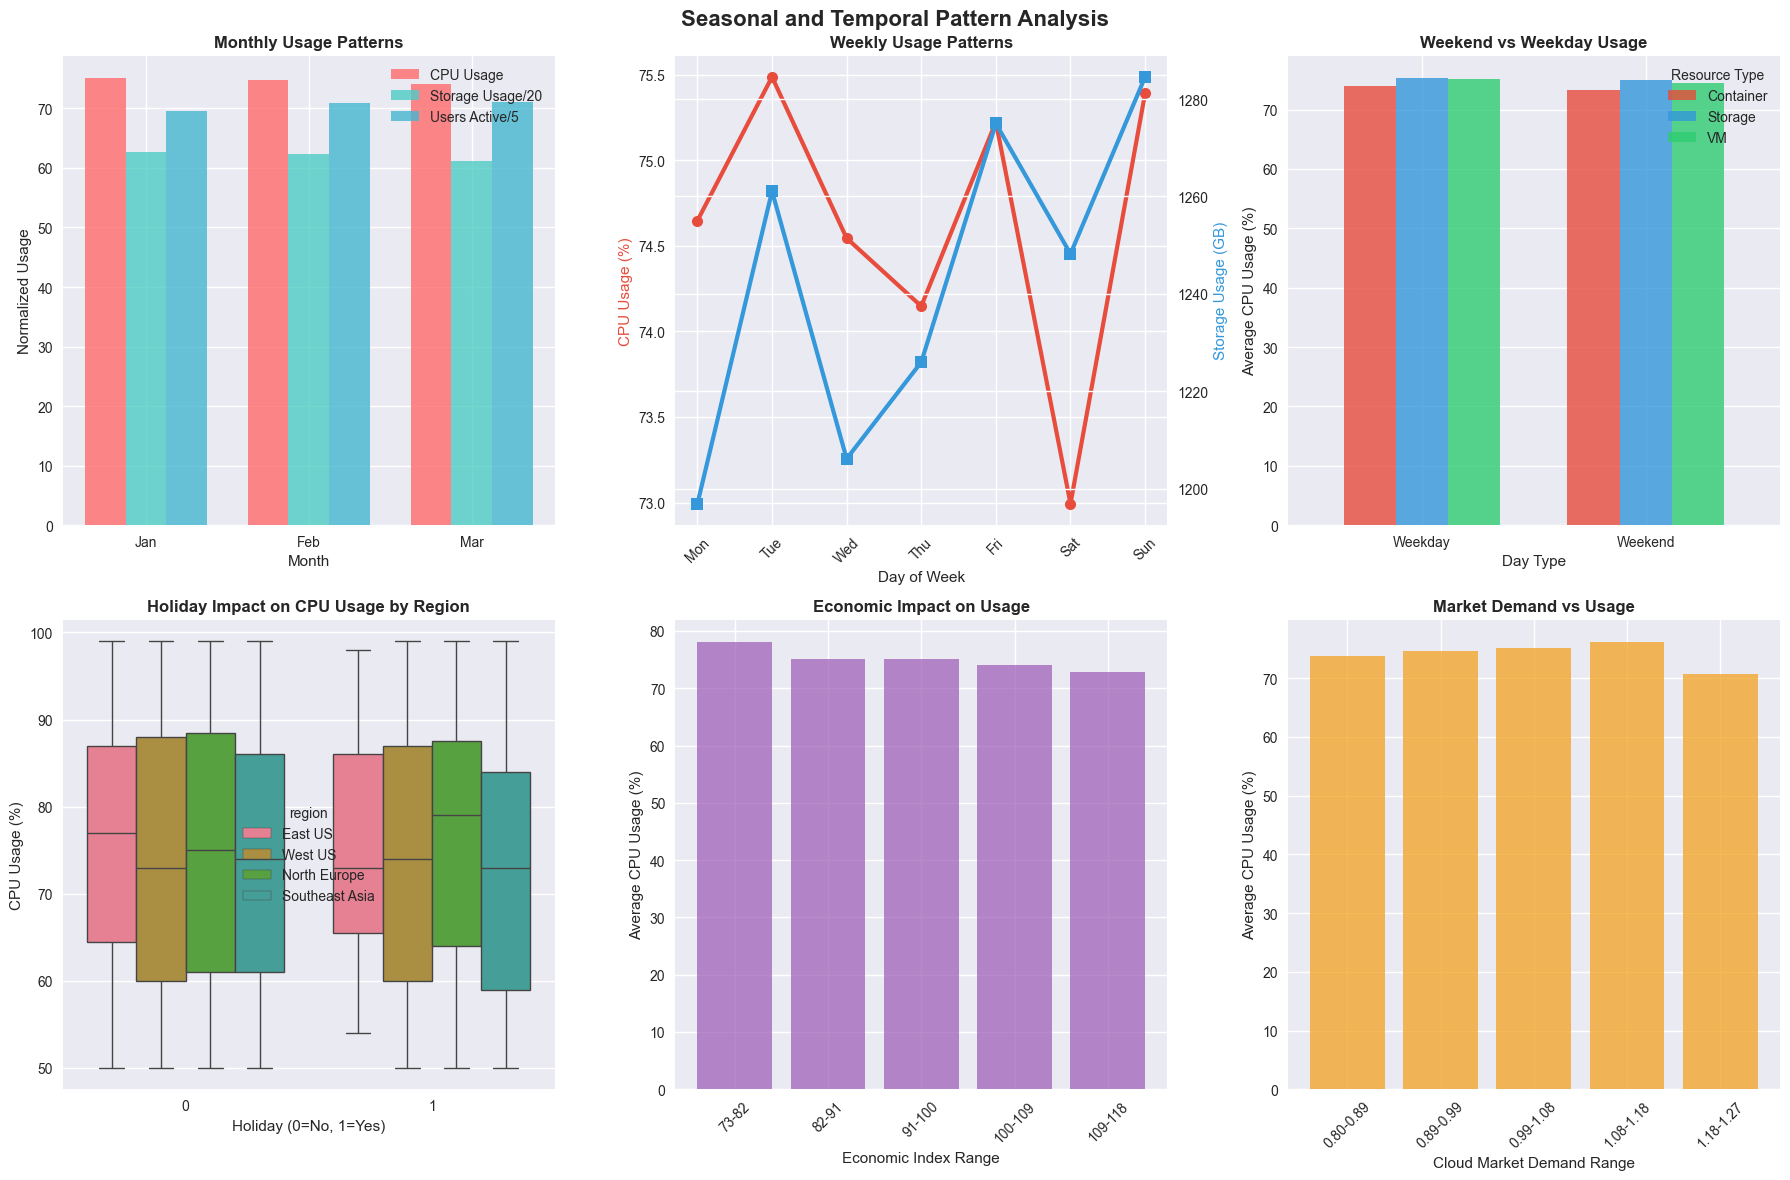

In [6]:
# Temporal pattern analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Seasonal and Temporal Pattern Analysis', fontsize=16, fontweight='bold')

# 1. Monthly trend analysis
monthly_data = df.groupby('month_name').agg({
    'usage_cpu': 'mean',
    'usage_storage': 'mean',
    'users_active': 'mean'
})

months_order = ['Jan', 'Feb', 'Mar']
monthly_ordered = monthly_data.reindex(months_order)

x_pos = np.arange(len(months_order))
width = 0.25

bars1 = axes[0,0].bar(x_pos - width, monthly_ordered['usage_cpu'], width, 
                     label='CPU Usage', color='#FF6B6B', alpha=0.8)
bars2 = axes[0,0].bar(x_pos, monthly_ordered['usage_storage']/20, width, 
                     label='Storage Usage/20', color='#4ECDC4', alpha=0.8)
bars3 = axes[0,0].bar(x_pos + width, monthly_ordered['users_active']/5, width, 
                     label='Users Active/5', color='#45B7D1', alpha=0.8)

axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Normalized Usage')
axes[0,0].set_title('Monthly Usage Patterns', fontweight='bold')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(months_order)
axes[0,0].legend()

# 2. Day of week analysis
dow_data = df.groupby('day_name').agg({
    'usage_cpu': 'mean',
    'usage_storage': 'mean'
})

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_ordered = dow_data.reindex(day_order)

axes[0,1].plot(day_order, dow_ordered['usage_cpu'], marker='o', linewidth=3, 
              markersize=8, color='#E74C3C', label='CPU Usage')
ax_twin = axes[0,1].twinx()
ax_twin.plot(day_order, dow_ordered['usage_storage'], marker='s', linewidth=3, 
            markersize=8, color='#3498DB', label='Storage Usage')

axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('CPU Usage (%)', color='#E74C3C')
ax_twin.set_ylabel('Storage Usage (GB)', color='#3498DB')
axes[0,1].set_title('Weekly Usage Patterns', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Weekend vs Weekday analysis
weekend_analysis = df.groupby(['is_weekend', 'resource_type'])['usage_cpu'].mean().unstack()
weekend_analysis.index = ['Weekday', 'Weekend']

weekend_analysis.plot(kind='bar', ax=axes[0,2], width=0.7, alpha=0.8,
                     color=['#E74C3C', '#3498DB', '#2ECC71'])
axes[0,2].set_title('Weekend vs Weekday Usage', fontweight='bold')
axes[0,2].set_ylabel('Average CPU Usage (%)')
axes[0,2].set_xlabel('Day Type')
axes[0,2].tick_params(axis='x', rotation=0)
axes[0,2].legend(title='Resource Type')

# 4. Holiday impact analysis
holiday_impact = df.groupby(['holiday', 'region']).agg({
    'usage_cpu': 'mean',
    'users_active': 'mean'
}).reset_index()

holiday_impact['holiday_label'] = holiday_impact['holiday'].map({0: 'Regular Day', 1: 'Holiday'})

sns.boxplot(data=df, x='holiday', y='usage_cpu', hue='region', ax=axes[1,0])
axes[1,0].set_title('Holiday Impact on CPU Usage by Region', fontweight='bold')
axes[1,0].set_xlabel('Holiday (0=No, 1=Yes)')
axes[1,0].set_ylabel('CPU Usage (%)')

# 5. Economic index correlation with usage
economic_corr = df.groupby(pd.cut(df['economic_index'], bins=5)).agg({
    'usage_cpu': 'mean',
    'usage_storage': 'mean',
    'users_active': 'mean'
})

# Create labels for economic index ranges
econ_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in economic_corr.index]

x_pos = np.arange(len(econ_labels))
axes[1,1].bar(x_pos, economic_corr['usage_cpu'], alpha=0.7, color='#9B59B6')
axes[1,1].set_xlabel('Economic Index Range')
axes[1,1].set_ylabel('Average CPU Usage (%)')
axes[1,1].set_title('Economic Impact on Usage', fontweight='bold')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(econ_labels, rotation=45)

# 6. Cloud market demand vs usage correlation
demand_bins = pd.cut(df['cloud_market_demand'], bins=5)
demand_corr = df.groupby(demand_bins)['usage_cpu'].mean()

demand_labels = [f'{interval.left:.2f}-{interval.right:.2f}' for interval in demand_corr.index]
x_pos = np.arange(len(demand_labels))
axes[1,2].bar(x_pos, demand_corr.values, alpha=0.7, color='#F39C12')
axes[1,2].set_xlabel('Cloud Market Demand Range')
axes[1,2].set_ylabel('Average CPU Usage (%)')
axes[1,2].set_title('Market Demand vs Usage', fontweight='bold')
axes[1,2].set_xticks(x_pos)
axes[1,2].set_xticklabels(demand_labels, rotation=45)

plt.tight_layout()
plt.savefig(f"{save_path}/Seasonal and Temporal Pattern Analysis.png")
plt.show()

## 5. Advanced Statistical Analysis and Insights

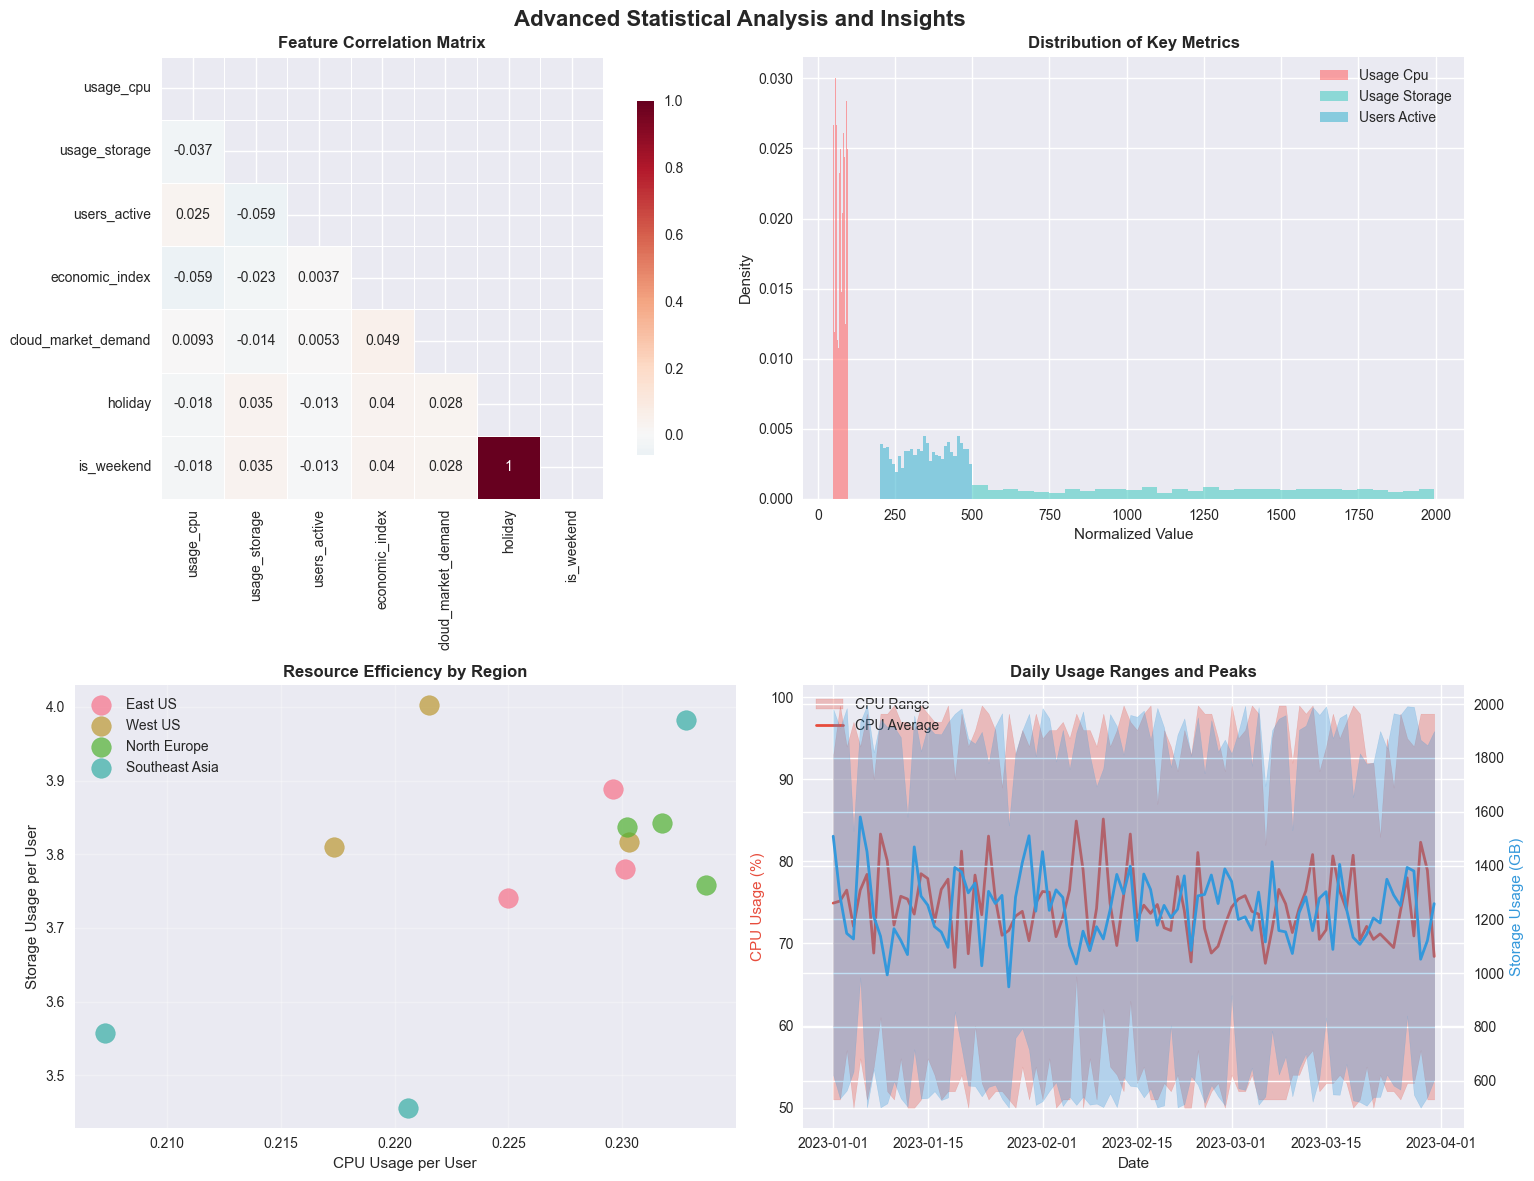

In [7]:
# Advanced statistical analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advanced Statistical Analysis and Insights', fontsize=16, fontweight='bold')

# 1. Correlation heatmap of all numerical features
numeric_cols = ['usage_cpu', 'usage_storage', 'users_active', 'economic_index', 
               'cloud_market_demand', 'holiday', 'is_weekend']
correlation_matrix = df[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=axes[0,0])
axes[0,0].set_title('Feature Correlation Matrix', fontweight='bold')

# 2. Distribution analysis of key metrics
key_metrics = ['usage_cpu', 'usage_storage', 'users_active']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (metric, color) in enumerate(zip(key_metrics, colors)):
    axes[0,1].hist(df[metric], bins=30, alpha=0.6, label=metric.replace('_', ' ').title(), 
                  color=color, density=True)

axes[0,1].set_xlabel('Normalized Value')
axes[0,1].set_ylabel('Density')
axes[0,1].set_title('Distribution of Key Metrics', fontweight='bold')
axes[0,1].legend()

# 3. Resource efficiency analysis
df['cpu_per_user'] = df['usage_cpu'] / df['users_active']
df['storage_per_user'] = df['usage_storage'] / df['users_active']

efficiency_data = df.groupby(['region', 'resource_type']).agg({
    'cpu_per_user': 'mean',
    'storage_per_user': 'mean'
}).reset_index()

# Create bubble chart
for region in df['region'].unique():
    region_data = efficiency_data[efficiency_data['region'] == region]
    axes[1,0].scatter(region_data['cpu_per_user'], region_data['storage_per_user'], 
                     s=200, alpha=0.7, label=region)

axes[1,0].set_xlabel('CPU Usage per User')
axes[1,0].set_ylabel('Storage Usage per User')
axes[1,0].set_title('Resource Efficiency by Region', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Peak usage identification
daily_peaks = df.groupby('date').agg({
    'usage_cpu': ['mean', 'max', 'min'],
    'usage_storage': ['mean', 'max', 'min']
})

# Flatten column names
daily_peaks.columns = ['_'.join(col).strip() for col in daily_peaks.columns]

axes[1,1].fill_between(daily_peaks.index, daily_peaks['usage_cpu_min'], 
                      daily_peaks['usage_cpu_max'], alpha=0.3, color='#E74C3C', label='CPU Range')
axes[1,1].plot(daily_peaks.index, daily_peaks['usage_cpu_mean'], 
              linewidth=2, color='#E74C3C', label='CPU Average')

# Add secondary axis for storage
ax_twin = axes[1,1].twinx()
ax_twin.fill_between(daily_peaks.index, daily_peaks['usage_storage_min'], 
                    daily_peaks['usage_storage_max'], alpha=0.3, color='#3498DB')
ax_twin.plot(daily_peaks.index, daily_peaks['usage_storage_mean'], 
            linewidth=2, color='#3498DB', label='Storage Average')

axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('CPU Usage (%)', color='#E74C3C')
ax_twin.set_ylabel('Storage Usage (GB)', color='#3498DB')
axes[1,1].set_title('Daily Usage Ranges and Peaks', fontweight='bold')
axes[1,1].legend(loc='upper left')

plt.tight_layout()

plt.show()

## 6. Performance Insights Summary

In [8]:
# Generate comprehensive summary statistics
print("🔍 AZURE DEMAND FORECASTING - PERFORMANCE INSIGHTS SUMMARY")
print("=" * 70)

# Overall statistics
print("\n📊 OVERALL PERFORMANCE METRICS:")
print(f"• Average CPU Usage: {df['usage_cpu'].mean():.1f}% (±{df['usage_cpu'].std():.1f}%)")
print(f"• Average Storage Usage: {df['usage_storage'].mean():.0f} GB (±{df['usage_storage'].std():.0f} GB)")
print(f"• Average Active Users: {df['users_active'].mean():.0f} (±{df['users_active'].std():.0f})")
print(f"• Peak CPU Usage: {df['usage_cpu'].max()}%")
print(f"• Peak Storage Usage: {df['usage_storage'].max()} GB")

# Regional insights
print("\n🌍 REGIONAL PERFORMANCE:")
regional_summary = df.groupby('region').agg({
    'usage_cpu': 'mean',
    'usage_storage': 'mean',
    'users_active': 'mean'
}).round(1)

for region in regional_summary.index:
    cpu_avg = regional_summary.loc[region, 'usage_cpu']
    storage_avg = regional_summary.loc[region, 'usage_storage']
    users_avg = regional_summary.loc[region, 'users_active']
    print(f"• {region}: CPU {cpu_avg}%, Storage {storage_avg:.0f}GB, Users {users_avg:.0f}")

# Resource type insights
print("\n⚙️ RESOURCE TYPE ANALYSIS:")
resource_summary = df.groupby('resource_type').agg({
    'usage_cpu': 'mean',
    'usage_storage': 'mean'
}).round(1)

for resource in resource_summary.index:
    cpu_avg = resource_summary.loc[resource, 'usage_cpu']
    storage_avg = resource_summary.loc[resource, 'usage_storage']
    print(f"• {resource}: CPU {cpu_avg}%, Storage {storage_avg:.0f}GB")

# Temporal insights
print("\n⏰ TEMPORAL PATTERNS:")
holiday_effect = df.groupby('holiday')['usage_cpu'].mean()
weekend_effect = df.groupby('is_weekend')['usage_cpu'].mean()

print(f"• Holiday Effect: Regular days {holiday_effect[0]:.1f}% vs Holidays {holiday_effect[1]:.1f}%")
print(f"• Weekend Effect: Weekdays {weekend_effect[0]:.1f}% vs Weekends {weekend_effect[1]:.1f}%")

# Correlation insights
print("\n🔗 KEY CORRELATIONS:")
cpu_storage_corr = df['usage_cpu'].corr(df['usage_storage'])
cpu_users_corr = df['usage_cpu'].corr(df['users_active'])
cpu_economic_corr = df['usage_cpu'].corr(df['economic_index'])

print(f"• CPU vs Storage Usage: {cpu_storage_corr:.3f}")
print(f"• CPU vs Active Users: {cpu_users_corr:.3f}")
print(f"• CPU vs Economic Index: {cpu_economic_corr:.3f}")

# Recommendations
print("\n💡 KEY RECOMMENDATIONS:")
best_region = regional_summary['usage_cpu'].idxmax()
most_efficient_resource = resource_summary['usage_cpu'].idxmin()

print(f"• Highest performing region: {best_region}")
print(f"• Most CPU-efficient resource type: {most_efficient_resource}")
print(f"• Holiday planning: Usage {'increases' if holiday_effect[1] > holiday_effect[0] else 'decreases'} during holidays")
print(f"• Weekend optimization: Usage {'increases' if weekend_effect[1] > weekend_effect[0] else 'decreases'} on weekends")

print("\n" + "=" * 70)

🔍 AZURE DEMAND FORECASTING - PERFORMANCE INSIGHTS SUMMARY

📊 OVERALL PERFORMANCE METRICS:
• Average CPU Usage: 74.7% (±14.5%)
• Average Storage Usage: 1242 GB (±432 GB)
• Average Active Users: 353 (±86)
• Peak CPU Usage: 99%
• Peak Storage Usage: 1995 GB

🌍 REGIONAL PERFORMANCE:
• East US: CPU 75.6%, Storage 1244GB, Users 354
• North Europe: CPU 74.9%, Storage 1228GB, Users 347
• Southeast Asia: CPU 73.9%, Storage 1220GB, Users 356
• West US: CPU 74.2%, Storage 1278GB, Users 354

⚙️ RESOURCE TYPE ANALYSIS:
• Container: CPU 73.8%, Storage 1234GB
• Storage: CPU 75.3%, Storage 1228GB
• VM: CPU 74.9%, Storage 1265GB

⏰ TEMPORAL PATTERNS:
• Holiday Effect: Regular days 74.8% vs Holidays 74.2%
• Weekend Effect: Weekdays 74.8% vs Weekends 74.2%

🔗 KEY CORRELATIONS:
• CPU vs Storage Usage: -0.037
• CPU vs Active Users: 0.025
• CPU vs Economic Index: -0.059

💡 KEY RECOMMENDATIONS:
• Highest performing region: East US
• Most CPU-efficient resource type: Container
• Holiday planning: Usage decrea

## 7. Export Summary Statistics

In [9]:
# Create comprehensive summary dataframes for export

# 1. Daily summary statistics
daily_summary = df.groupby('date').agg({
    'usage_cpu': ['mean', 'max', 'min', 'std'],
    'usage_storage': ['mean', 'max', 'min', 'std'],
    'users_active': ['mean', 'max', 'min', 'std'],
    'economic_index': 'first',
    'cloud_market_demand': 'first',
    'holiday': 'first'
}).round(2)

# Flatten column names
daily_summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in daily_summary.columns]

# 2. Regional performance summary
regional_performance = df.groupby(['region', 'resource_type']).agg({
    'usage_cpu': ['mean', 'std'],
    'usage_storage': ['mean', 'std'],
    'users_active': ['mean', 'std']
}).round(2)

regional_performance.columns = ['_'.join(col).strip() for col in regional_performance.columns]

# 3. Correlation analysis
correlation_analysis = df[['usage_cpu', 'usage_storage', 'users_active', 
                          'economic_index', 'cloud_market_demand']].corr().round(3)

# Save to CSV files
daily_summary.to_csv('azure_daily_summary.csv')
regional_performance.to_csv('azure_regional_performance.csv')
correlation_analysis.to_csv('azure_correlation_analysis.csv')

print("📁 Summary files exported:")
print("• azure_daily_summary.csv - Daily aggregated statistics")
print("• azure_regional_performance.csv - Regional and resource type analysis")
print("• azure_correlation_analysis.csv - Feature correlation matrix")

# Display sample of exported data
print("\n📋 Sample of Daily Summary:")
print(daily_summary.head())

print("\n📋 Sample of Regional Performance:")
print(regional_performance.head())

📁 Summary files exported:
• azure_daily_summary.csv - Daily aggregated statistics
• azure_regional_performance.csv - Regional and resource type analysis
• azure_correlation_analysis.csv - Feature correlation matrix

📋 Sample of Daily Summary:
            usage_cpu_mean  usage_cpu_max  usage_cpu_min  usage_cpu_std  \
date                                                                      
2023-01-01           74.92             93             51          14.44   
2023-01-02           75.17             99             51          20.58   
2023-01-03           76.50             94             57          12.20   
2023-01-04           72.08             97             50          16.55   
2023-01-05           76.50             94             56          14.43   

            usage_storage_mean  usage_storage_max  usage_storage_min  \
date                                                                   
2023-01-01             1509.00               1982                621   
2023-01-02     